Sampling rate: 1000.00 MHz
Carrier frequency: 433.92 MHz
Sampling time: 5.0 ms
Baudrate: 2000 bps


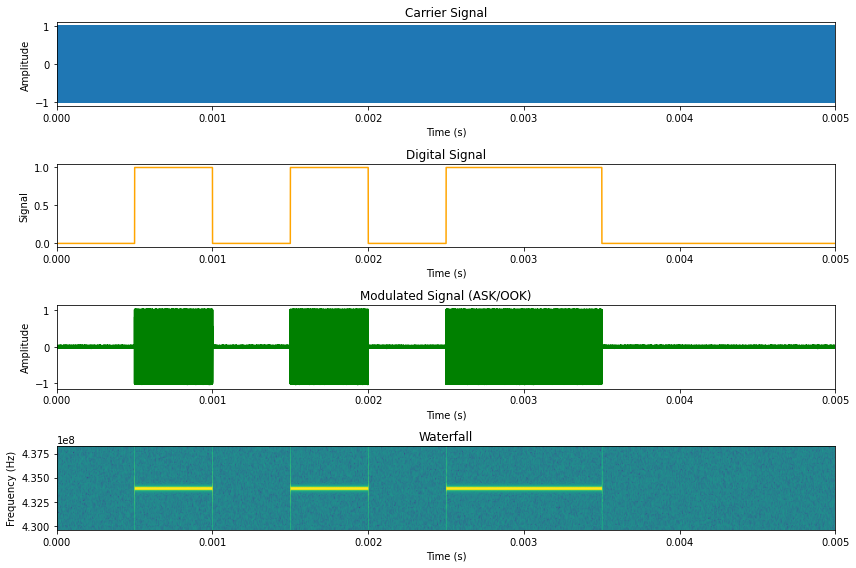

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
fs = 1e9        # Abtastrate (Hz)
t0 = 0
t1 = 0.005
t = np.linspace(t0, t1, int(((t1-t0)*fs)), endpoint=False)  # Zeitvektor von 0 bis 1 Sekunde
f_carrier = 433.92e6    # Frequenz des Trägers (Hz)
baudrate = 2000         # Baudrate (bps)
bits = [0, 1, 0, 1, 0, 1, 1, 0]  # Digitales Signal (1 für Sendezeit, 0 für Pausen)
power_table = [0.0, 1]    # Leistungstabelle für die Modulation (ASK/OOK)

print(f"Sampling rate: {fs/1e6:.2f} MHz")
print(f"Carrier frequency: {f_carrier/1e6:.2f} MHz")
print(f"Sampling time: {(t1-t0)*1000} ms")
print(f"Baudrate: {baudrate} bps")
# Trägersignal: Sinuswelle
carrier = np.sin(2 * np.pi * f_carrier * t)

# Digitales Signal (ASK/OOK) - Beispiel: Ein einfaches Rechtecksignal
# Hier definieren wir 1 für Sendezeit und 0 für Pausen
# Wir erzeugen ein digitales Signal, das abwechselnd 0.2 Sekunden 1 und 0 hat
signal = np.zeros(len(t))
for i, bit in enumerate(bits):
    signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)] = power_table[bit]

#digital_signal = np.where((t % (4/baudrate)) < 2/baudrate, 1, 0)
digital_signal = signal

# Modulation: ASK/OOK
modulated_signal = carrier * digital_signal
noise = np.random.normal(0, 0.01, modulated_signal.shape)
modulated_signal += noise

# Plotten der Signale
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(t0, t1)

plt.subplot(4, 1, 2)
plt.plot(t, digital_signal, color='orange')
plt.title("Digital Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.xlim(t0, t1)

plt.subplot(4, 1, 3)
plt.plot(t, modulated_signal, color='green')
plt.title("Modulated Signal (ASK/OOK)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(t0, t1)

plt.subplot(4, 1, 4)
plt.specgram(modulated_signal, Fs=fs, NFFT=8096, noverlap=4096, cmap='viridis')
plt.title("Waterfall")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.xlim(t0, t1)
plt.ylim(0.99*f_carrier, 1.01*f_carrier)

plt.tight_layout()
plt.show()

Sampling rate: 1000.00 MHz
Carrier frequency: 433.92 MHz
Sampling time: 5.0 ms
Baudrate: 2000 bps


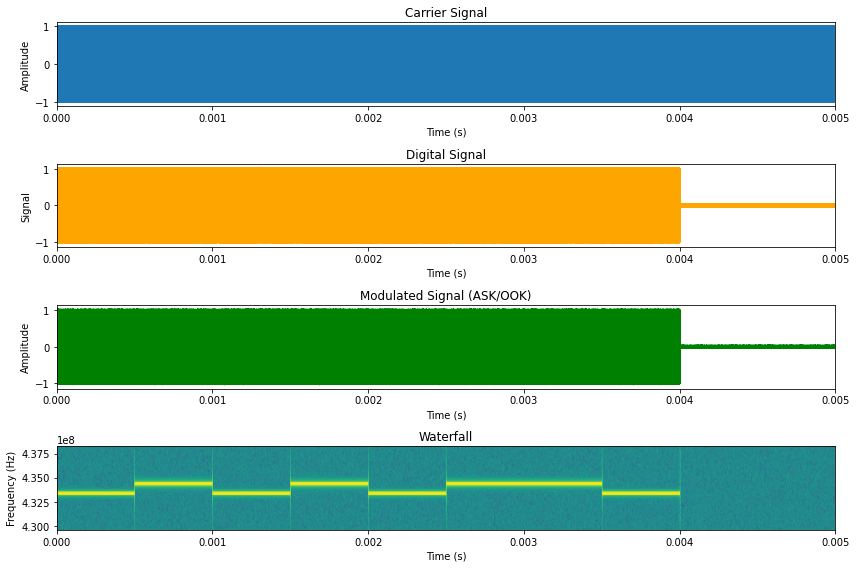

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
fs = 1e9        # Abtastrate (Hz)
t0 = 0
t1 = 0.005
t = np.linspace(t0, t1, int(((t1-t0)*fs)), endpoint=False)  # Zeitvektor von 0 bis 1 Sekunde
f_carrier = 433.92e6    # Frequenz des Trägers (Hz)
baudrate = 2000         # Baudrate (bps)
bits = [0, 1, 0, 1, 0, 1, 1, 0]  # Digitales Signal (1 für Sendezeit, 0 für Pausen)
power_table = [0.0, 1]    # Leistungstabelle für die Modulation (ASK/OOK)
deviation = 1000e3        # Frequenzabweichung (Hz)

print(f"Sampling rate: {fs/1e6:.2f} MHz")
print(f"Carrier frequency: {f_carrier/1e6:.2f} MHz")
print(f"Sampling time: {(t1-t0)*1000} ms")
print(f"Baudrate: {baudrate} bps")
# Trägersignal: Sinuswelle
carrier = np.sin(2 * np.pi * f_carrier * t)

low_freq_signal = np.sin(2 * np.pi * (f_carrier - 0.5*deviation) * t)
high_freq_signal = np.sin(2 * np.pi * (f_carrier + 0.5*deviation) * t)
# Digitales Signal (ASK/OOK) - Beispiel: Ein einfaches Rechtecksignal
# Hier definieren wir 1 für Sendezeit und 0 für Pausen
# Wir erzeugen ein digitales Signal, das abwechselnd 0.2 Sekunden 1 und 0 hat
signal = np.zeros(len(t))
for i, bit in enumerate(bits):
    if bit == 0:
        signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)] = low_freq_signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)]
    else:
        signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)] = high_freq_signal[i*int(fs/baudrate):(i+1)*int(fs/baudrate)]

#digital_signal = np.where((t % (4/baudrate)) < 2/baudrate, 1, 0)
digital_signal = signal

# Modulation: ASK/OOK
modulated_signal = digital_signal
noise = np.random.normal(0, 0.01, modulated_signal.shape)
modulated_signal += noise

# Plotten der Signale
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(t0, t1)

plt.subplot(4, 1, 2)
plt.plot(t, digital_signal, color='orange')
plt.title("Digital Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.xlim(t0, t1)

plt.subplot(4, 1, 3)
plt.plot(t, modulated_signal, color='green')
plt.title("Modulated Signal (ASK/OOK)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(t0, t1)

plt.subplot(4, 1, 4)
plt.specgram(modulated_signal, Fs=fs, NFFT=8096, noverlap=4096, cmap='viridis')
plt.title("Waterfall")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.xlim(t0, t1)
plt.ylim(0.99*f_carrier, 1.01*f_carrier)

plt.tight_layout()
plt.show()